# Part 2: Sharing and Composition

In this part, we're going to show you (a) how to interpret a Flor experiment that someone else has shared with you, and (b) how you can re-use the artifacts of someone else's experiment in your own experiment. 

## Prepare your environment before starting the activities.

We're going to start by importing Flor and letting it know the name of our notebook.

In [18]:
# Import Flor
import flor

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# If the notebook name has not already been set, you are able to set the name in code. 
flor.setNotebookName('tutorial_2.ipynb')

## Interpreting someone else's work in Flor

In this next exercise, as in many "real-world" cases, you'll be joining an in-progress model development effort. Bob, a fellow member of your team, has already attempted two different data-preprocessing steps. Bob tells us he's done some preprocessing on text data and recommends we should try his preprocessed data. He tells us the name of his experiment: `bob_preproc`.

Run the cell below but notice that we are using a different experiment name (`bob_preproc` rather than `risecamp_demo`). Here, we are going to summarize someone else's past experiment versions.

In [19]:
flor.Experiment('bob_preproc').summarize()

,label,preprocess,intermediate_X,data_loc,intermediate_y
0,second_preproc,preprocess_4489614728.py,data_clean_X_112394722104.json,data_112399744192.json,data_clean_y_112394719416.json
1,first_preproc,preprocess_111988784040.py,data_clean_X_111988783760.json,data_111988784768.json,data_clean_y_111988784208.json


Let's interpret the output. The first column, `label`, lists the different versions of the experiment by name. We can see there are two past versions of the experiment `bob_preproc`: `first_preproc`, and `second_preproc`.  Now, let's pause for a second, run the next cell, and continue reading.

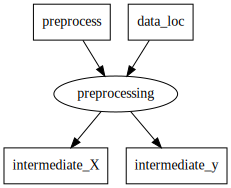

In [20]:
flor.Experiment('bob_preproc').plot('first_preproc')

We can now see the structure of the Flor Plan for Bob's preprocessing expriment. We see that there are four (4) rectangles: 
* Inputs: `preprocess`, `data_loc`
* Outputs: `intermediate_X`, and `intermediate_y`.

Notice how the names in the Flor Plan correspond to the names in the columns of the Summary Table.

Next, we inspect the structure of the dataflow graph for the second version of Bob's experiment:

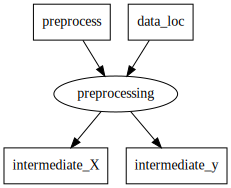

In [21]:
flor.Experiment('bob_preproc').plot('second_preproc')

We see that both node-link diagrams look the same. This means that the structure of the different experiment versions is the same; however, it is very likely that the contents of the computation graph differ. To see where the difference is, we `diff` the two versions of Bob's experiment.

In [22]:
flor.Experiment('bob_preproc').diff('first_preproc', 'second_preproc')

These files are different:
experiment_graph.pkl
preprocess.py
tutorial.ipynb



We see that `preprocess.py` was modified, so Bob probably tried two different preprocessing techniques. We see that `tutorial.ipynb` changed, probably because Bob ran a cell another time and that is enough to change a Jupyter notebook. Finally, you can see that a file called `experiment_graph.pkl` changed; this is internal information for Flor that we can ignore for now.

If we want to inspect the differences in more detail, we can do so by controlling the flags to `diff`. Below we add the flag `--minimal`, but you're welcome to try [other flags](https://git-scm.com/docs/git-diff).

In [23]:
flor.Experiment('bob_preproc').diff('first_preproc', 'second_preproc', flags=['--minimal'])

These files are different:
diff --git a/experiment_graph.pkl b/experiment_graph.pkl
index 365f32a..ea7912d 100644
Binary files a/experiment_graph.pkl and b/experiment_graph.pkl differ
diff --git a/preprocess.py b/preprocess.py
index ecc79d9..9484ac2 100644
--- a/preprocess.py
+++ b/preprocess.py
@@ -80,8 +80,8 @@ def preprocessing(data_loc, intermediate_X, intermediate_y, **kwargs):
         return ret_str 
 
     start_time = time.time()
-#     X = [filter_sentence(el) for el in X]
-    X = [train_drop(el) for el in X]
+    X = [filter_sentence(el) for el in X]
+#     X = [train_drop(el) for el in X]
     print("--- %s seconds ---" % (time.time() - start_time))
 
     y_new = []
diff --git a/tutorial.ipynb b/tutorial.ipynb
index a22b3ef..35531f0 100644
--- a/tutorial.ipynb
+++ b/tutorial.ipynb
@@ -31,7 +31,7 @@
   },
   {
    "cell_type": "code",
-   "execution_count": null,
+   "execution_count": 1,
    "metadata": {},
    "outputs": [],
    "source": [
@@ -68,7 +68,7 @@
   },
   {
 

At this point, we've used Flor to learn a bit about the preprocessing pipeline we inherited from Bob. Now let's start _using_ the preprocessed data he created; we'll inspect the preprocessing pipeline more deeply if/when we need to.

## Beyond the Basic Flor API: Flor's Extended API
In `tutorial_1.ipynb`, we used the `flor.track_action` decorator to wrap a pipeline and execute it with a minimum of extra Flor wrapper code. `track_action` infers a simple underlying Flor Plan for our code. We refer to functions wrapped with `track_action` as Flor's *basic* API. 

Although that minimalist use of Flor for wrapping pipelines is convenient, it has limited expressivity. In the next cell, we wrap our functions with the `flor.func` decorator, which exposes what we call Flor's *extended* API. The extended API requires the developer to explicitly declare a Flor Plan. This allows us to represent pipelines with many Actions, and enables us to re-use the Artifacts of someone else's experiment. This will require a bit more Flor annotation than our previous example, but it will also give us more detailed information.

## Using someone else's work in Flor

Having seen how we can "inherit" a Flor experiment, we will now see how two different users of Flor can share their experiments and the artifacts that they derive or consume.

Below, we copy/pasted the pipeline you worked on in `tutorial_1.ipynb`. We made the following changes: 
1. We switched from the basic to the extended Flor syntax. Notice the first lines: we use the `flor.func` decorator rather than `flor.track_action`.
2. Rather than preprocessing data ourselves, we pass in Bob's `intermediate_X` and `intermediate_y` artifacts

As before, we highlight the changes in `###`.

Here's a reminder of what the previous experiment versions look like:

In [24]:
flor.Experiment('bob_preproc').summarize()

,label,preprocess,data_loc,intermediate_y,intermediate_X
0,second_preproc,preprocess_4489614728.py,data_112399744192.json,data_clean_y_112394719416.json,data_clean_X_112394722104.json
1,first_preproc,preprocess_111988784040.py,data_111988784768.json,data_clean_y_111988784208.json,data_clean_X_111988783760.json


In [25]:
##########
@flor.func
##########               ##############  ##############
def split_train_and_eval(intermediate_X, intermediate_y, n_estimators, max_depth, **kwargs):
                         ##############  ##############
    import pandas as pd
    import json

    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report
            
              ##############
    with open(intermediate_X) as json_data:
              ##############
        X = json.load(json_data)
        json_data.close()
        
              ##############
    with open(intermediate_y) as json_data:
              ##############
        y = json.load(json_data)
        json_data.close()

    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=92)

    vectorizer = TfidfVectorizer()
    vectorizer.fit(X_tr)
    X_tr = vectorizer.transform(X_tr)
    X_te = vectorizer.transform(X_te)
    
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth).fit(X_tr, y_tr)
    
    y_pred = clf.predict(X_te)

    score = clf.score(X_te, y_te)
    print(score)
    
    return {'score': score}

Now, notice that unlike in `tutorial_1.ipynb`, running the cell above did not execute the experiment. That's because so far we've only told Flor to track this code, but we have yet to specify where this code fits in the overall Flor Plan (computation graph). We specify the Flor Plan below:

In [26]:
with flor.Experiment('bob_preproc') as bob, flor.Experiment('risecamp_demo') as ex:
    # This is how we tell Flor we will be using Bob's derived artifacts
    data_x = bob.artifact('data_clean_X.json', 'intermediate_X', label="first_preproc")
    data_y = bob.artifact('data_clean_y.json', 'intermediate_y', label="first_preproc")
    
    # This is how we specify the "literals" (parameters) of the Flor Plan for our experiments     
    n_estimators = ex.literal(7, 'n_estimators') # We pick the best number of estimators from the previous notebook
    max_depth = ex.literal(100, 'max_depth') # We pick the best max depth from the previous notebook
                                                                
    # This is where we put the code we declared in the cell above-
    #               And this is how we pass in Bob's artifacts ---|-------|
    #                                                          ---v-------v
    do_split_train_and_eval = ex.action(split_train_and_eval, [data_x, data_y, n_estimators, max_depth])
    score = ex.literal(name='score', parent=do_split_train_and_eval)


At this point, we've declared the code, declared the artifacts, and specified the Flor Plan of our experiment. We are now ready to run it, but first, let's make sure we built the graph we intended:

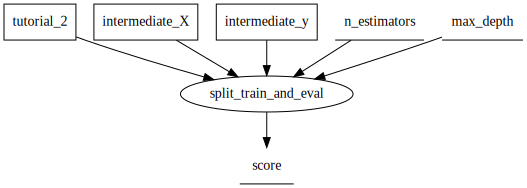

In [27]:
score.plot()

The graph looks as it should. Notice how we are now consuming Bob's `Intermediate_X` and `Intermediate_y` artifacts in our experiment. Although the extended Flor syntax involves the additional work of specifying the Flor Plan, this freedom allows us to track more context, and share artifacts across experiments.

Next, we run the experiment we've specified.

In [28]:
score.pull('fifth_pull')

An experiment with the name 'fifth_pull' exists


In [29]:
flor.Experiment('risecamp_demo').summarize()

,label,score,max_depth,n_estimators,intermediate_X,intermediate_y,tutorial_2,tutorial_1
0,sixth_pull,0.7460,100.0,7.0,data_clean_X_112394722104.json,data_clean_y_112394719416.json,tutorial_2_140276092881104.ipynb,NaN
1,fifth_pull,0.6520,100.0,7.0,data_clean_X_111988783760.json,data_clean_y_111988784208.json,tutorial_2_140276092876728.ipynb,NaN
2,2018-10-12_00-42-25,0.7331,100.0,7.0,NaN,NaN,NaN,tutorial_1_139742951853808.ipynb
3,2018-10-12_00-42-25,0.7002,10.0,7.0,NaN,NaN,NaN,tutorial_1_139742951853808.ipynb
4,2018-10-12_00-38-58,0.7089,NaN,NaN,NaN,NaN,NaN,tutorial_1_139742745119600.ipynb
5,2018-10-12_00-37-29,0.7044,NaN,NaN,NaN,NaN,NaN,tutorial_1_139741553533616.ipynb


When we summarize our `risecamp_demo` experiment, we can see all of the executions from `tutorial_1.ipynb` plus the new execution we just finished (`fifth_pull`). Interestingly, we see that despite using the best configuration from `tutorial_1.ipynb`: `n_estimators=7.0` and `max_depth=100`, our score dropped to around 65%.

The only thing we did differently was to use Bob's preprocessed data rather than preprocess our own data. We used the first version of Bob's preprocessed data, but there were two versions. Let's see whether the second and latest version performs better.

### Retrying the same experiment, but changing to Bob's latest version of the data
As before, let's start by looking at the summary of Bob's past experiments.

In [30]:
flor.Experiment('bob_preproc').summarize()

,label,intermediate_X,preprocess,intermediate_y,data_loc
0,second_preproc,data_clean_X_112394722104.json,preprocess_4489614728.py,data_clean_y_112394719416.json,data_112399744192.json
1,first_preproc,data_clean_X_111988783760.json,preprocess_111988784040.py,data_clean_y_111988784208.json,data_111988784768.json


We already tried label `first_preproc` , so let's try `second_preproc` this time. We already specified the Flor Plan above, and we are satisfied with the plan, we just want to update the version of the data. We do so as follows:

In [31]:
data_x.version = "second_preproc"
data_y.version = "second_preproc"

We plot to make sure the plan didn't change structurally:

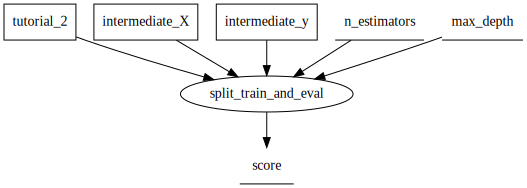

In [32]:
score.plot()

We see that the Flor Plan didn't change, so we execute a new version of our experiment, using Bob's latest version of the preprocessed data.

In [33]:
score.pull('sixth_pull')

An experiment with the name 'sixth_pull' exists


We check the results one more time:

In [34]:
flor.Experiment('risecamp_demo').summarize()

,label,score,n_estimators,max_depth,intermediate_y,intermediate_X,tutorial_2,tutorial_1
0,sixth_pull,0.7460,7.0,100.0,data_clean_y_112394719416.json,data_clean_X_112394722104.json,tutorial_2_140276092881104.ipynb,NaN
1,fifth_pull,0.6520,7.0,100.0,data_clean_y_111988784208.json,data_clean_X_111988783760.json,tutorial_2_140276092876728.ipynb,NaN
2,2018-10-12_00-42-25,0.7002,7.0,10.0,NaN,NaN,NaN,tutorial_1_139742951853808.ipynb
3,2018-10-12_00-42-25,0.7331,7.0,100.0,NaN,NaN,NaN,tutorial_1_139742951853808.ipynb
4,2018-10-12_00-38-58,0.7089,NaN,NaN,NaN,NaN,NaN,tutorial_1_139742745119600.ipynb
5,2018-10-12_00-37-29,0.7044,NaN,NaN,NaN,NaN,NaN,tutorial_1_139741553533616.ipynb


Now we see that our score is the highest yet, so it was a good idea to switch to Bob's latest version of the data. 

## Summary of Part 2
In this notebook we learned how to use Flor's extended API via `flor.func` decorators. This required us to manually compose a Flor plan, but one with richer detail. In particular, it allowed us to knit together a Flor plan from another developer into our own larger Flor Plan. This illustrates how writing a clear pipeline in Flor can help others interpret your work, and re-use artifacts you derived, whether they are code or data.

## Thank you! You may now move on to `tutorial_3.ipynb`